In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Polynomial regression analysis..


In [ ]:
# load Data using pandas
csv_path = r"E:\VsCode\ML_Project\DataSets\coffee_shop_revenue.csv"
coffee_data = pd.read_csv(csv_path)

<span style="color: green; font-weight: bold; font-size: 30px;">Pre-Processing for polynomial analysis...</span>


In [ ]:
coffee_data.head(10)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42
5,121,8.88,6,9,183.49,484,1155.18
6,238,9.00,11,4,331.35,156,2179.13
7,70,7.81,10,3,273.27,237,890.17
8,152,8.78,14,2,341.79,825,1704.94
9,171,7.73,7,5,344.51,135,2025.55


In [ ]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [ ]:
# check missing values
print("Missing values: ", coffee_data.isnull().sum(), "\n")

Missing values:  Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64 



In [ ]:
# check type
print("Data types: ", coffee_data.dtypes)

Data types:  Number_of_Customers_Per_Day      int64
Average_Order_Value            float64
Operating_Hours_Per_Day          int64
Number_of_Employees              int64
Marketing_Spend_Per_Day        float64
Location_Foot_Traffic            int64
Daily_Revenue                  float64
dtype: object


___

<span style="color:rgb(181, 52, 255); font-weight: bold; font-size: 25px;">-- Divide data into target variable and predictors </span>


In [ ]:
Y = coffee_data['Daily_Revenue']
X = coffee_data.drop(['Daily_Revenue'], axis=1)

In [ ]:
Y.head(5)

0    1547.81
1    2084.68
2    3118.39
3    2912.20
4    1663.42
Name: Daily_Revenue, dtype: float64

In [ ]:
X.head(5)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic
0,152,6.74,14,4,106.62,97
1,485,4.50,12,8,57.83,744
2,398,9.09,6,6,91.76,636
3,320,8.48,17,4,462.63,770
4,156,7.44,17,2,412.52,232


<span style="color:rgb(181, 52, 255); font-weight: bold; font-size: 25px;">-- Split the data into 80/20 </span>

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [ ]:
X_train

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic
1773,459,8.06,15,7,337.69,259
13,422,3.69,7,4,233.23,186
389,414,7.87,10,6,354.18,191
946,144,5.35,17,12,130.71,896
596,339,5.61,12,12,277.42,241
...,...,...,...,...,...,...
1603,471,6.84,16,5,291.01,442
502,320,8.16,6,8,392.53,602
537,278,5.10,7,14,487.63,848
1220,50,6.15,12,9,76.89,626


In [ ]:
X_test

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic
1072,105,4.79,15,12,58.04,86
1048,219,9.30,15,6,220.62,696
204,380,5.28,12,14,48.53,215
694,391,5.04,11,2,494.30,311
1758,129,8.24,11,12,207.79,755
...,...,...,...,...,...,...
43,100,7.66,8,14,456.98,627
1090,105,8.89,17,10,125.43,608
9,171,7.73,7,5,344.51,135
1338,146,9.08,16,7,74.20,57


In [ ]:
Y_train

1773    3846.70
13      1817.02
389     3487.98
946      885.01
596     2186.01
         ...   
1603    3182.85
502     2635.07
537     1904.45
1220     382.77
175     1904.28
Name: Daily_Revenue, Length: 1600, dtype: float64

In [ ]:
Y_test

1072     328.22
1048    1890.32
204     1982.68
694     2165.16
1758     989.97
         ...   
43      1177.41
1090    1407.92
9       2025.55
1338    1768.82
147     2936.39
Name: Daily_Revenue, Length: 400, dtype: float64

<span style="color:rgb(181, 52, 255); font-weight: bold; font-size: 25px;">-- Polynomial models </span>

<span style="color:red; font-weight: bold; font-size: 22px;">-- Model in degree_2 </span>

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 1.Polynomial Features </span>

In [ ]:
# Create PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)

# train the model
x_train_deg2 = poly_features.fit_transform(X_train)

# test the model
x_test_deg2 = poly_features.transform(X_test)

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 2. Train the model </span>

In [ ]:
deg2_model = LinearRegression()
deg2_model.fit(x_train_deg2, Y_train)

LinearRegression()

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 4. Prediction phase </span>

In [ ]:
y_train_pred_deg2 = deg2_model.predict(x_train_deg2)
y_test_pred_deg2 = deg2_model.predict(x_test_deg2)

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 5. Visualization phase </span>

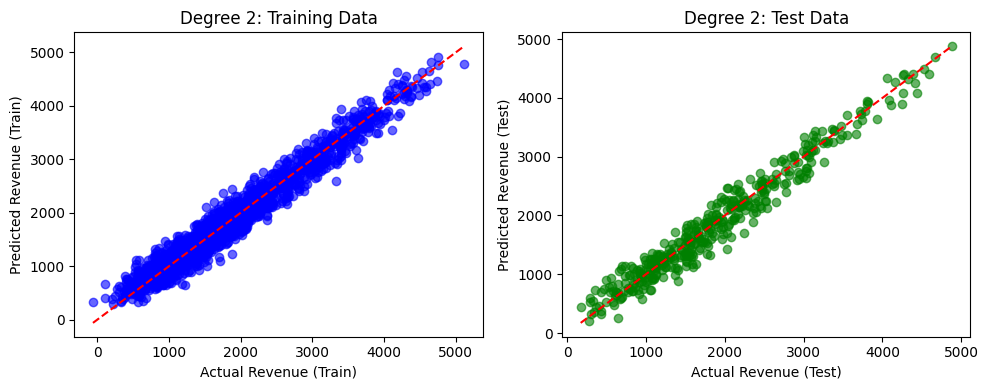

In [ ]:
plt.figure(figsize=(10, 4))

# Training Data
plt.subplot(1, 2, 1)
plt.scatter(Y_train, y_train_pred_deg2, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--')
plt.xlabel("Actual Revenue (Train)")
plt.ylabel("Predicted Revenue (Train)")
plt.title("Degree 2: Training Data")

# Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, y_test_pred_deg2, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Revenue (Test)")
plt.ylabel("Predicted Revenue (Test)")
plt.title("Degree 2: Test Data")

plt.tight_layout()
plt.show()

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 5. Evaluate the model </span>

In [ ]:
deg2_MSE_train = mean_squared_error(Y_train, y_train_pred_deg2)
deg2_MSE_test = mean_squared_error(Y_test, y_test_pred_deg2)

deg2_r2_score_train = r2_score(Y_train, y_train_pred_deg2)
deg2_r2_score_test = r2_score(Y_test, y_test_pred_deg2)

print(f"Training MSE: {deg2_MSE_train:.4f}, R²: {deg2_r2_score_train:.4f}")
print(f"Testing MSE: {deg2_MSE_test:.4f}, R²: {deg2_r2_score_test:.4f}")

Training MSE: 40182.4155, R²: 0.9579
Testing MSE: 39731.1348, R²: 0.9580


<span style="color:red; font-weight: bold; font-size: 22px;">-- Model in degree_3 </span>

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 1.Polynomial Features </span>

In [ ]:
# Create PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)

# train the model
x_train_deg3 = poly_features.fit_transform(X_train)

# test the model
x_test_deg3 = poly_features.transform(X_test)

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 2. Train the model </span>

In [ ]:
deg3_model = LinearRegression()
deg3_model.fit(x_train_deg3, Y_train)

LinearRegression()

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 3. Prediction phase </span>

In [ ]:
y_train_pred_deg3 = deg3_model.predict(x_train_deg3)
y_test_pred_deg3 = deg3_model.predict(x_test_deg3)

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 4. Visualization phase </span>

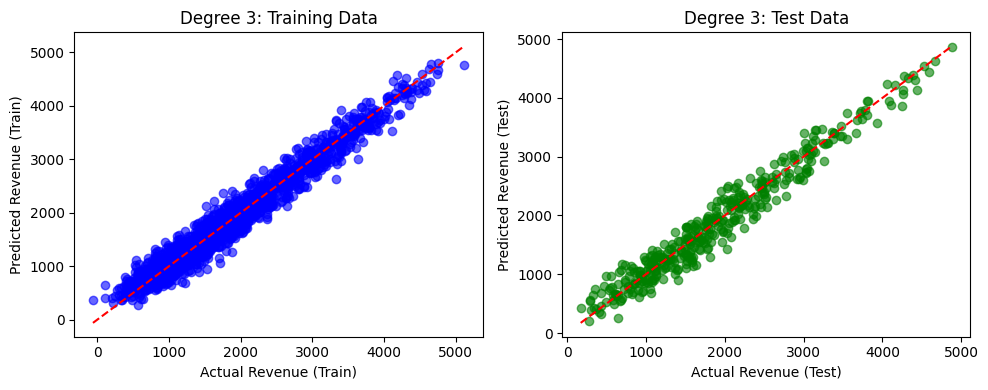

In [ ]:
plt.figure(figsize=(10, 4))

# Training Data
plt.subplot(1, 2, 1)
plt.scatter(Y_train, y_train_pred_deg3, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--')
plt.xlabel("Actual Revenue (Train)")
plt.ylabel("Predicted Revenue (Train)")
plt.title("Degree 3: Training Data")

# Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, y_test_pred_deg3, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Revenue (Test)")
plt.ylabel("Predicted Revenue (Test)")
plt.title("Degree 3: Test Data")

plt.tight_layout()
plt.show()

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 5. Evaluate the model </span>

In [ ]:
deg3_MSE_train = mean_squared_error(Y_train, y_train_pred_deg3)
deg3_MSE_test = mean_squared_error(Y_test, y_test_pred_deg3)

deg3_r2_score_train = r2_score(Y_train, y_train_pred_deg3)
deg3_r2_score_test = r2_score(Y_test, y_test_pred_deg3)

print(f"Training MSE: {deg3_MSE_train:.4f}, R²: {deg3_r2_score_train:.4f}")
print(f"Testing MSE: {deg3_MSE_test:.4f}, R²: {deg3_r2_score_test:.4f}")

Training MSE: 38774.1208, R²: 0.9594
Testing MSE: 41788.0925, R²: 0.9558


<span style="color:red; font-weight: bold; font-size: 22px;">-- Model in degree_4 </span>

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 1.Polynomial Features </span>

In [ ]:
# Create PolynomialFeatures
poly_features = PolynomialFeatures(degree=4)

# train the model
x_train_deg4 = poly_features.fit_transform(X_train)

# test the model
x_test_deg4 = poly_features.transform(X_test)

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 2. Train the model </span>

In [ ]:
deg4_model = LinearRegression()
deg4_model.fit(x_train_deg4, Y_train)

LinearRegression()

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 3. Prediction phase </span>

In [ ]:
y_train_pred_deg4 = deg4_model.predict(x_train_deg4)
y_test_pred_deg4 = deg4_model.predict(x_test_deg4)

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 4. Visualization phase </span>

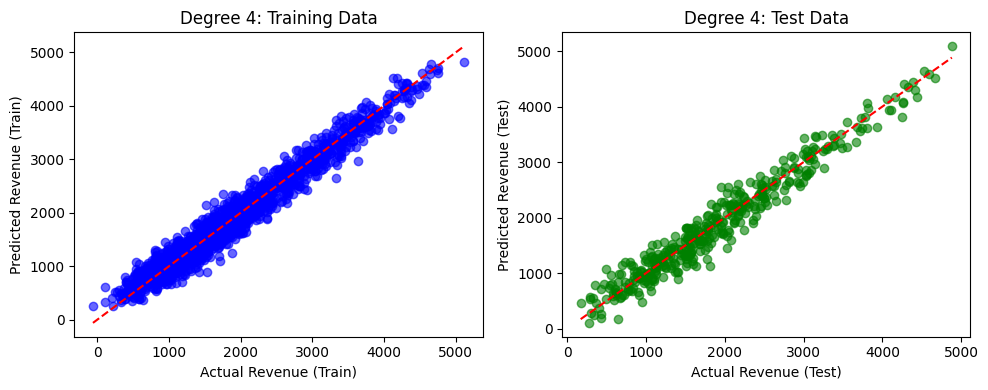

In [ ]:
plt.figure(figsize=(10, 4))

# Training Data
plt.subplot(1, 2, 1)
plt.scatter(Y_train, y_train_pred_deg4, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--')
plt.xlabel("Actual Revenue (Train)")
plt.ylabel("Predicted Revenue (Train)")
plt.title("Degree 4: Training Data")

# Training Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, y_test_pred_deg4, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Revenue (Test)")
plt.ylabel("Predicted Revenue (Test)")
plt.title("Degree 4: Test Data")

plt.tight_layout()
plt.show()

<span style="color:cyan; font-weight: bold; font-size: 20px;"> 5. Evaluate the model </span>

In [ ]:
deg4_MSE_train = mean_squared_error(Y_train, y_train_pred_deg4)
deg4_MSE_test = mean_squared_error(Y_test, y_test_pred_deg4)

deg4_r2_score_train = r2_score(Y_train, y_train_pred_deg4)
deg4_r2_score_test = r2_score(Y_test, y_test_pred_deg4)

print(f"Training MSE: {deg4_MSE_train:.4f}, R²: {deg4_r2_score_train:.4f}")
print(f"Testing MSE: {deg4_MSE_test:.4f}, R²: {deg4_r2_score_test:.4f}")

Training MSE: 36367.0616, R²: 0.9619
Testing MSE: 46270.1844, R²: 0.9511


<span style="color:rgb(181, 52, 255); font-weight: bold; font-size: 25px;">-- comparing models </span>

In [ ]:
# models
degrees = ['Degree 2', 'Degree 3', 'Degree 4']

# features
MSE = [deg2_MSE_test, deg3_MSE_test, deg4_MSE_test]
R2_Score = [deg2_r2_score_test, deg3_r2_score_test, deg4_r2_score_test]

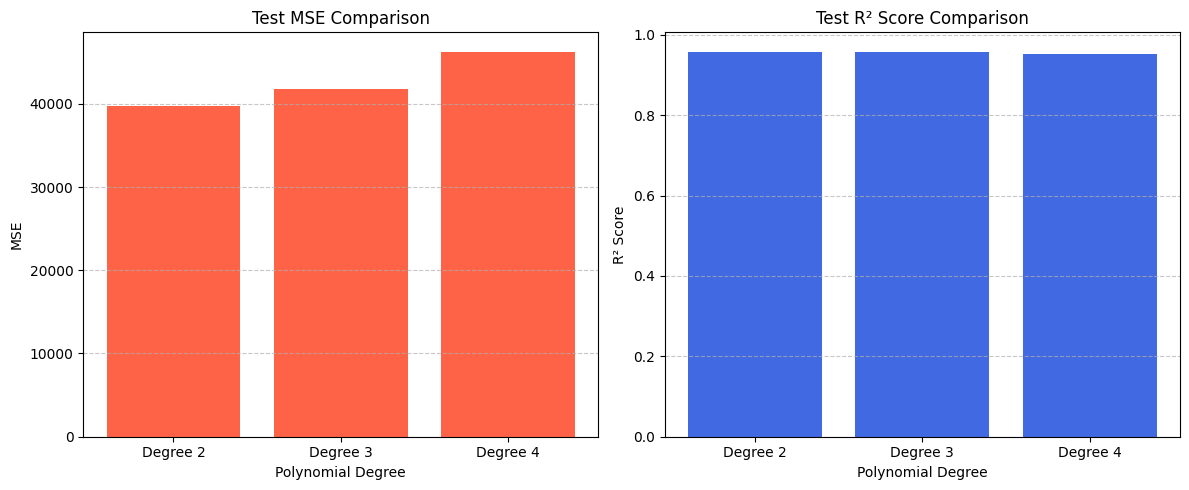

In [ ]:
plt.figure(figsize=(12, 5))

# MSE
plt.subplot(1, 2, 1)
plt.bar(degrees, MSE, color='tomato')
plt.title('Test MSE Comparison')
plt.ylabel('MSE')
plt.xlabel('Polynomial Degree')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# R2
plt.subplot(1, 2, 2)
plt.bar(degrees, R2_Score, color='royalblue')
plt.title('Test R² Score Comparison')
plt.ylabel('R² Score')
plt.xlabel('Polynomial Degree')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()